In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

#data preparation
#importing data file 
dataframe = pd.read_csv("cle.csv")
#replacing ? with NaN
dataframe=dataframe.replace('?', np.nan) 
dataframe.isnull().sum()

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    4
6.0      2
0        0
dtype: int64

In [2]:
#data cleaning
from sklearn.impute import SimpleImputer
#null values into mean values
ip = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
ip = ip.fit(dataframe)
imputed_data = ip.transform(dataframe.values) #transforming null values of dataset in to most_frequent

#it is in array form so converting it into list
df= imputed_data.tolist()
#list to dataframe
data = pd.DataFrame(df, columns = ['AGE','SEX','CP','TRESBPS','CHOL','FBS','RESTECG','THALACHE','EXANG','OLDPEAK','SLOPE','CA','THAL','NUM'])
#matrix =np.corrcoef(data)
data.isnull().sum()

AGE         0
SEX         0
CP          0
TRESBPS     0
CHOL        0
FBS         0
RESTECG     0
THALACHE    0
EXANG       0
OLDPEAK     0
SLOPE       0
CA          0
THAL        0
NUM         0
dtype: int64

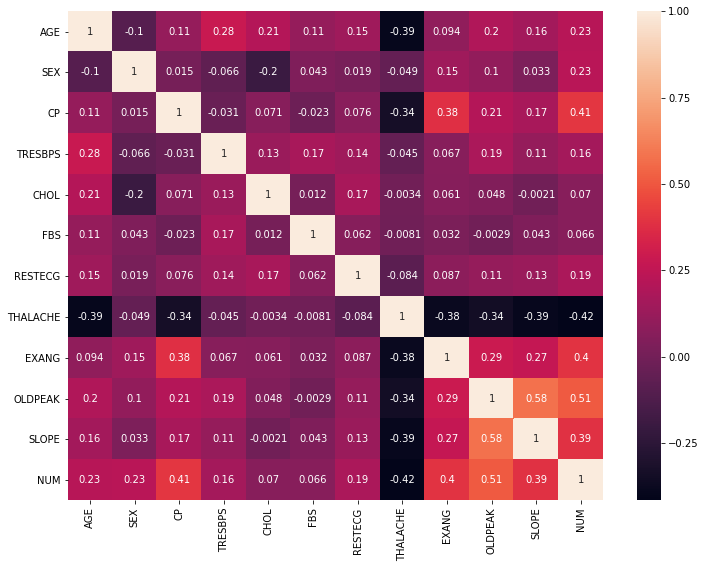

In [3]:
import seaborn as sns
#finding correlation between diffrent features
relation = data.corr()

# ploting the heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
sns.heatmap(relation, xticklabels=relation.columns, yticklabels=relation.columns, annot=True)

In [4]:
#drop un related columns
data = data.drop(['CHOL','FBS'], axis=1)
#integrating highly co- related columns
data['old_cp_thalache']=data['OLDPEAK']+data['CP']+1/data['THALACHE']


data = data.drop('OLDPEAK', 1)
data = data.drop('CP', 1)
data = data.drop('THALACHE', 1)

x=data.iloc[:,:-1].values
y=data['NUM'].values

In [5]:
#data modeling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=220, max_depth=5, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)  


#performance measurement
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

print(score)

0.9452613286993717


In [7]:
#performance improvement
from sklearn.model_selection import cross_val_score
scores= cross_val_score(clf,x,y, cv=4)
print(scores)
print(scores.mean())

[0.94805195 0.98684211 0.94736842 0.95890411]
0.9602916459891946
